In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import scipy
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]

from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

m0_scale    = 14
m0_min      = 3.6
m0_max      = 14.8
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

# out_dir='plots'
# if not os.path.isdir(out_dir):
#     os.makedirs(out_dir)
# save = True

In [2]:
valid_data_path_ResNet_B6='/pscratch/sd/b/bbbam/ResNet_B6_Nodes_4.0/ResNet_B6_13_channel_massregressor_2024_08_19_20:14:03_GPUS_16/'

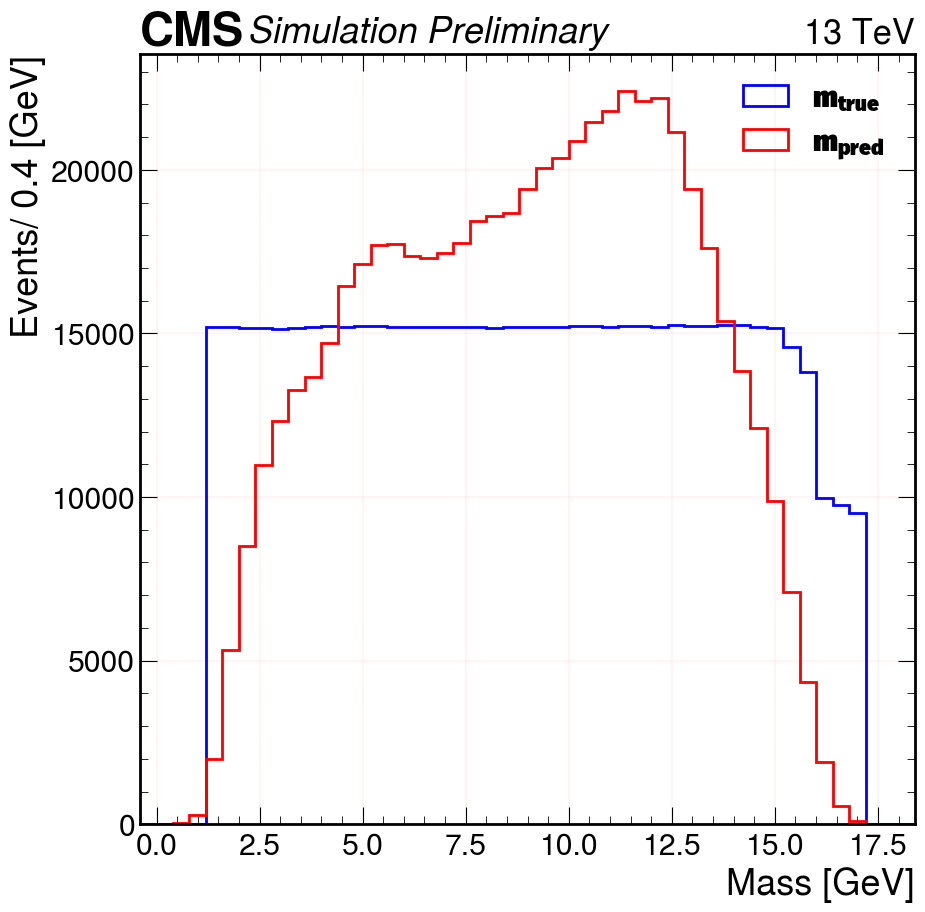

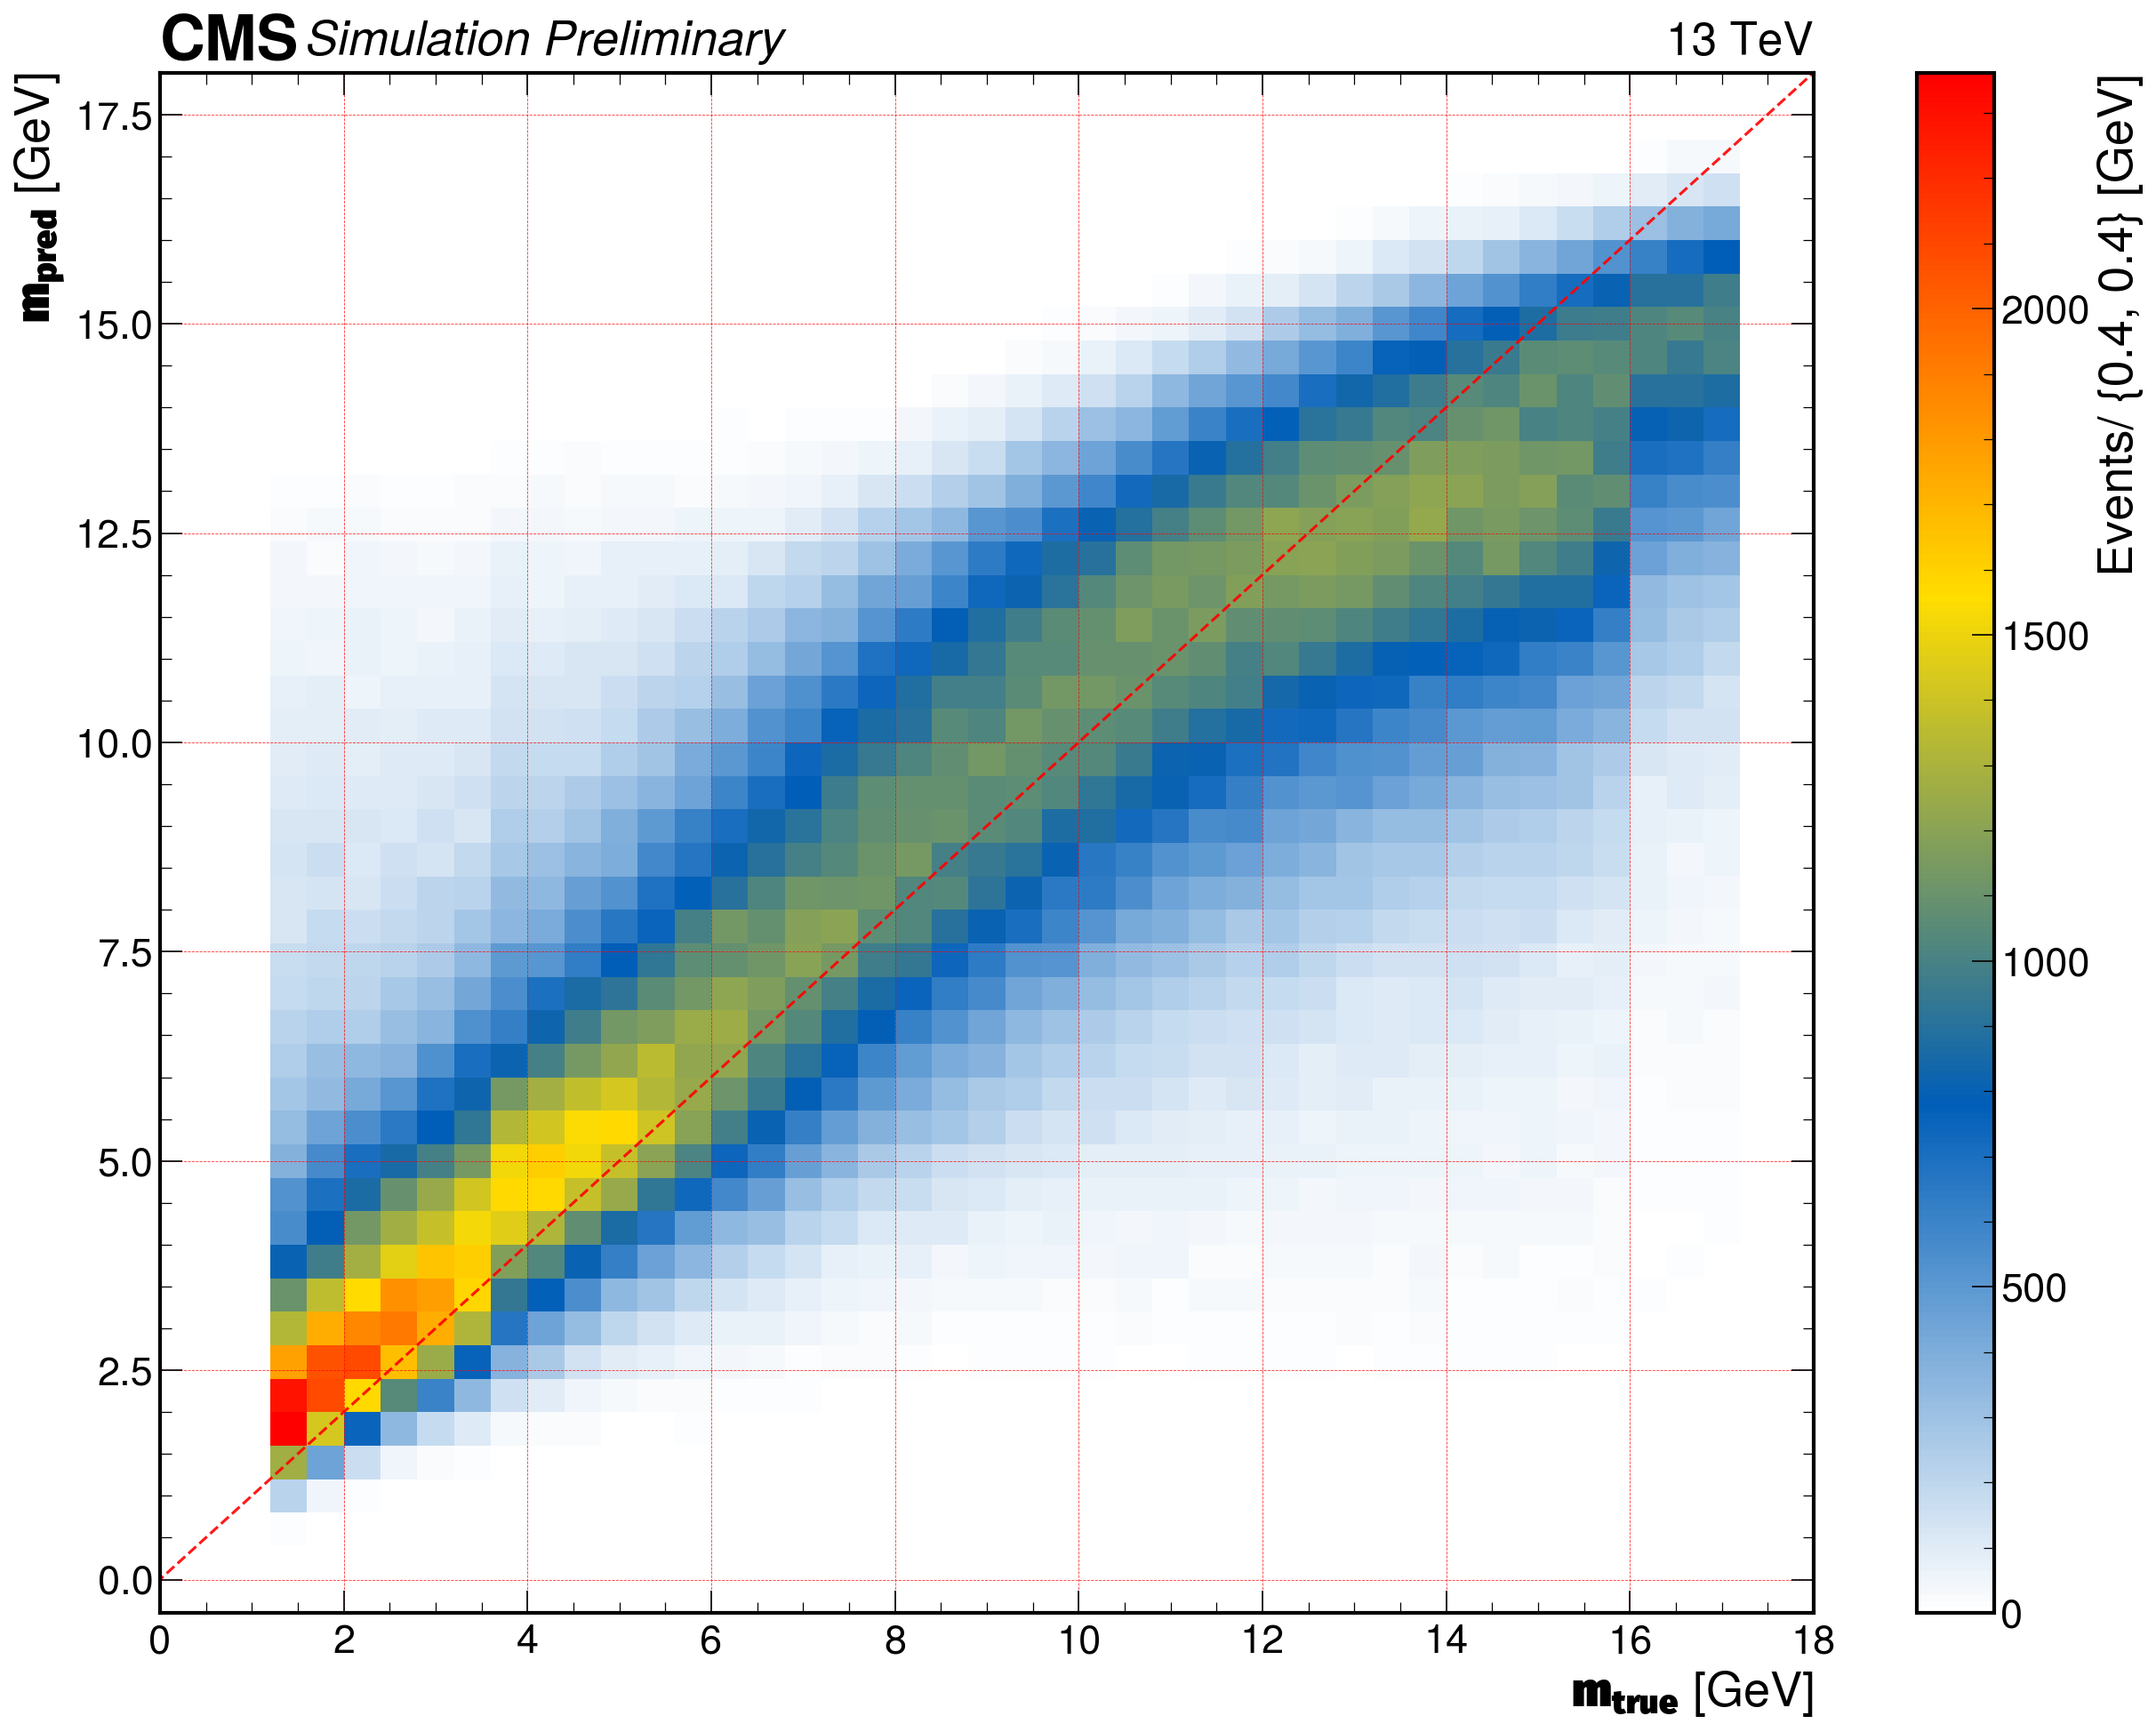

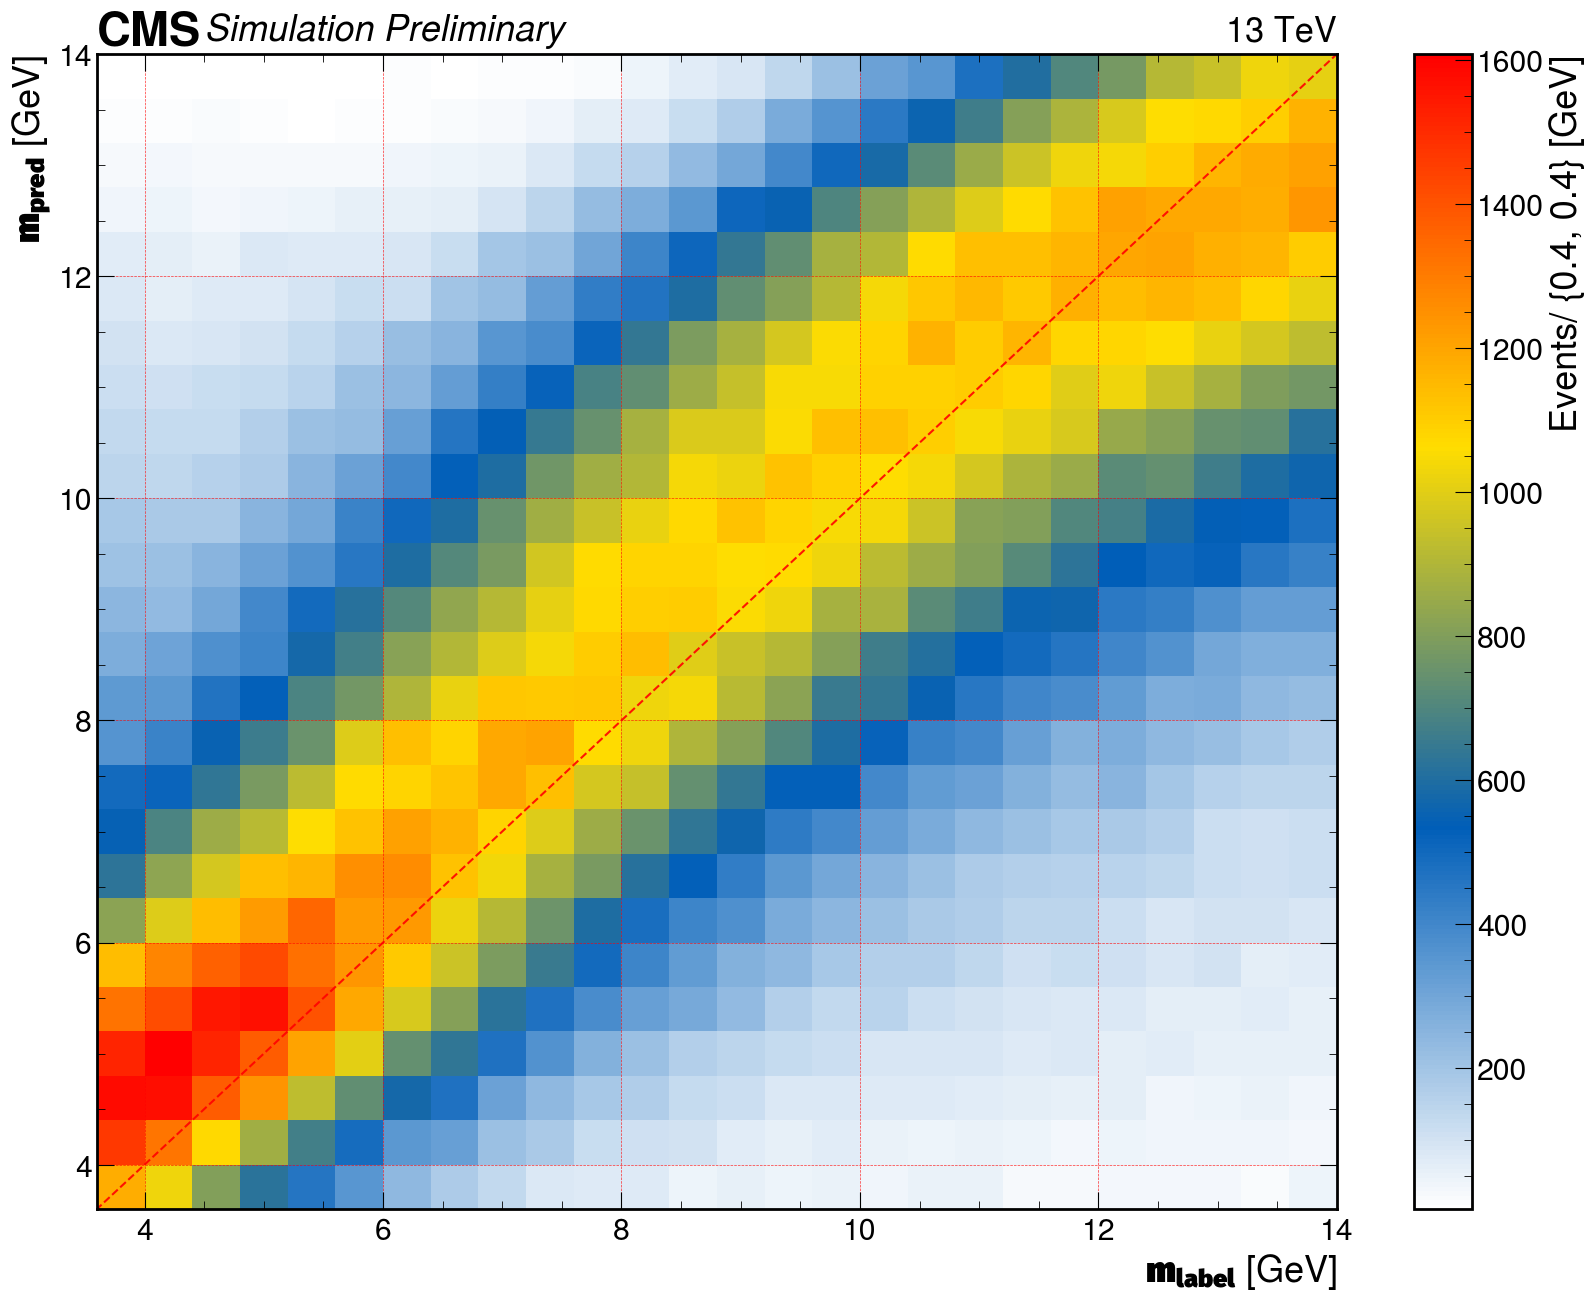

In [7]:
epoch=300
m_true_, m_pred_ = [], []
data_files = glob.glob(f"{valid_data_path_ResNet_B6}/valid_data_epoch_{epoch}/*.pkl")
for file in data_files:
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_.append(data["m_true"])
    m_pred_.append(data["m_pred"])


m_true_ = np.concatenate(m_true_)
m_pred_ = np.concatenate(m_pred_)

m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()



# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(3.6, 14.1, .8),size=15)
# plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()
exit


### fitting  to residuals mean

---------------------- Original plot ---------------------------------


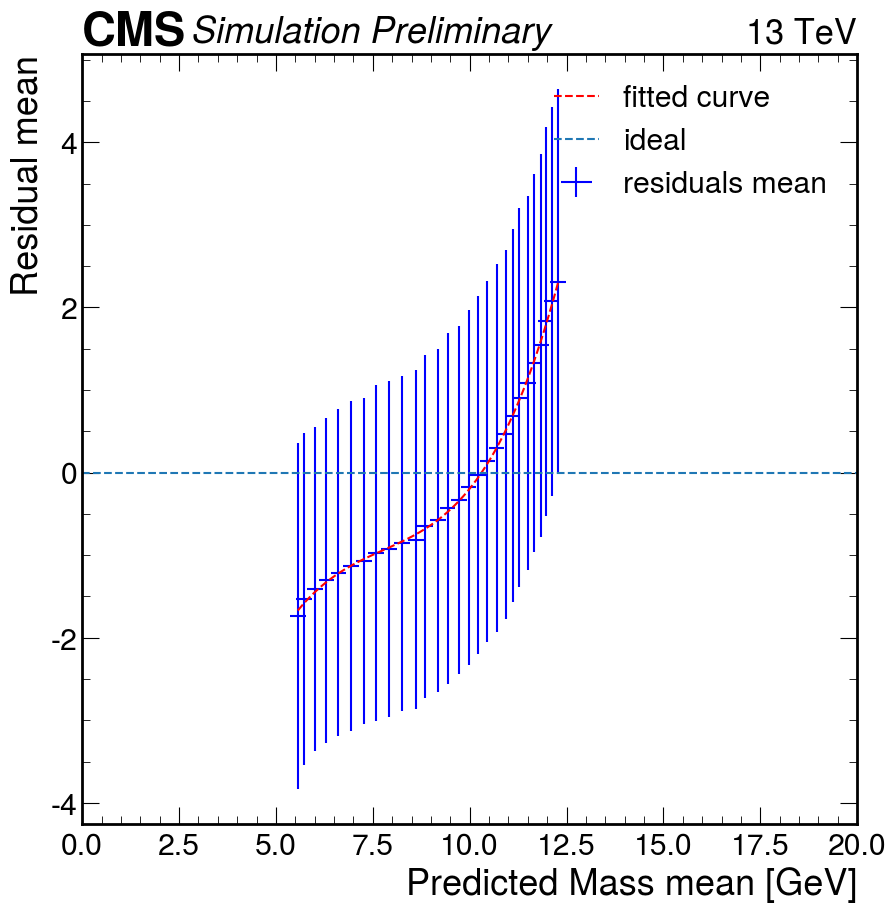

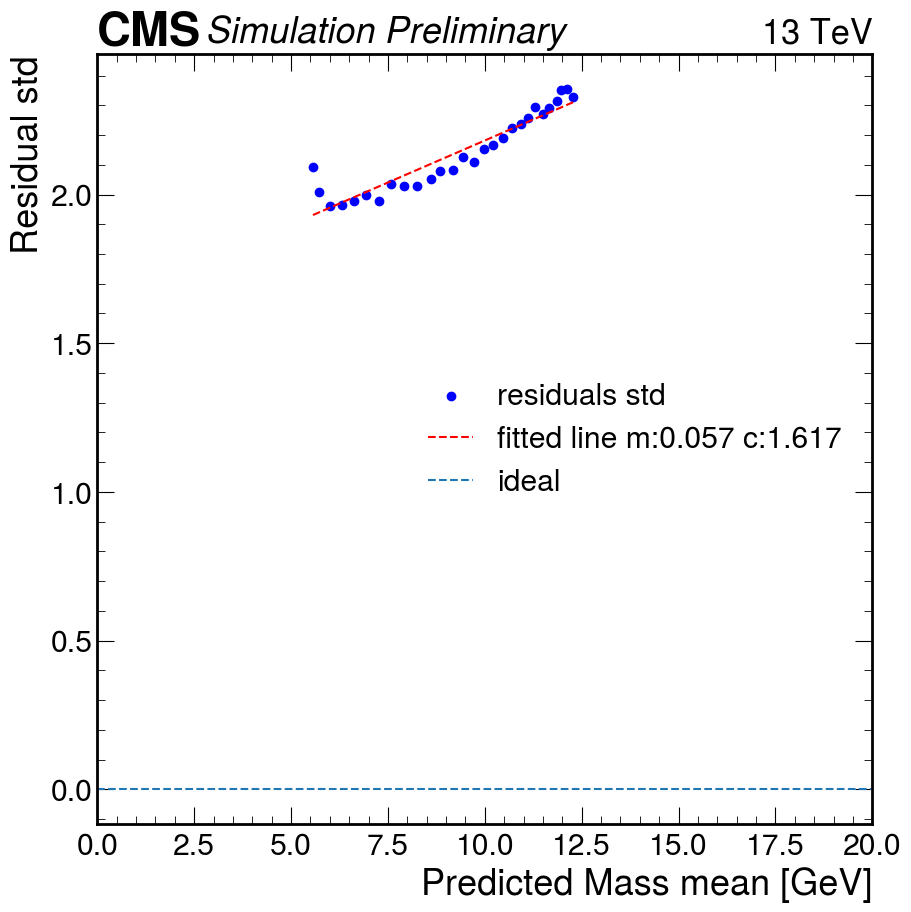

---------------------- frist correction plot ---------------------------------


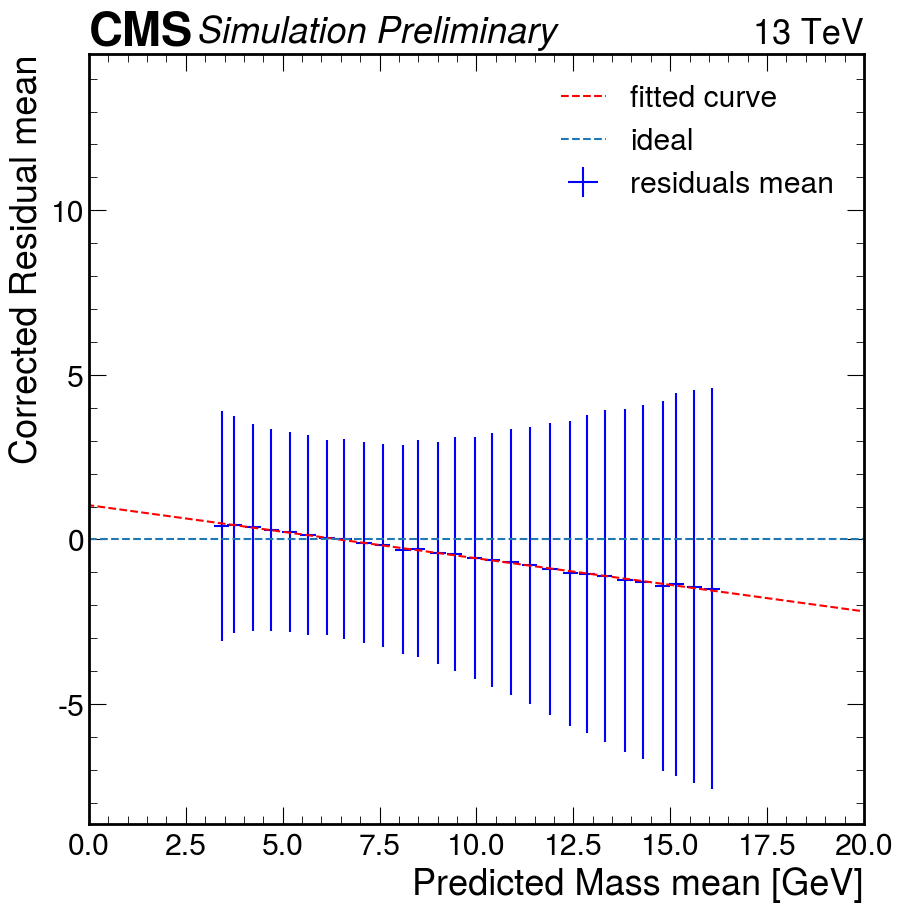

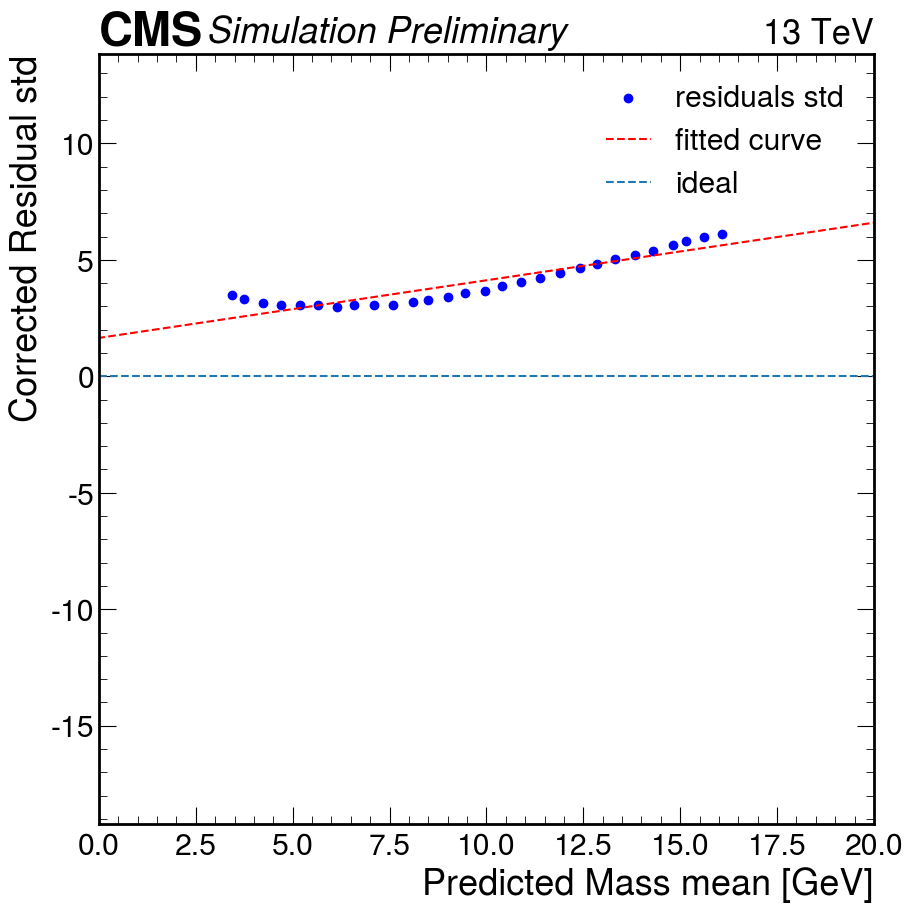

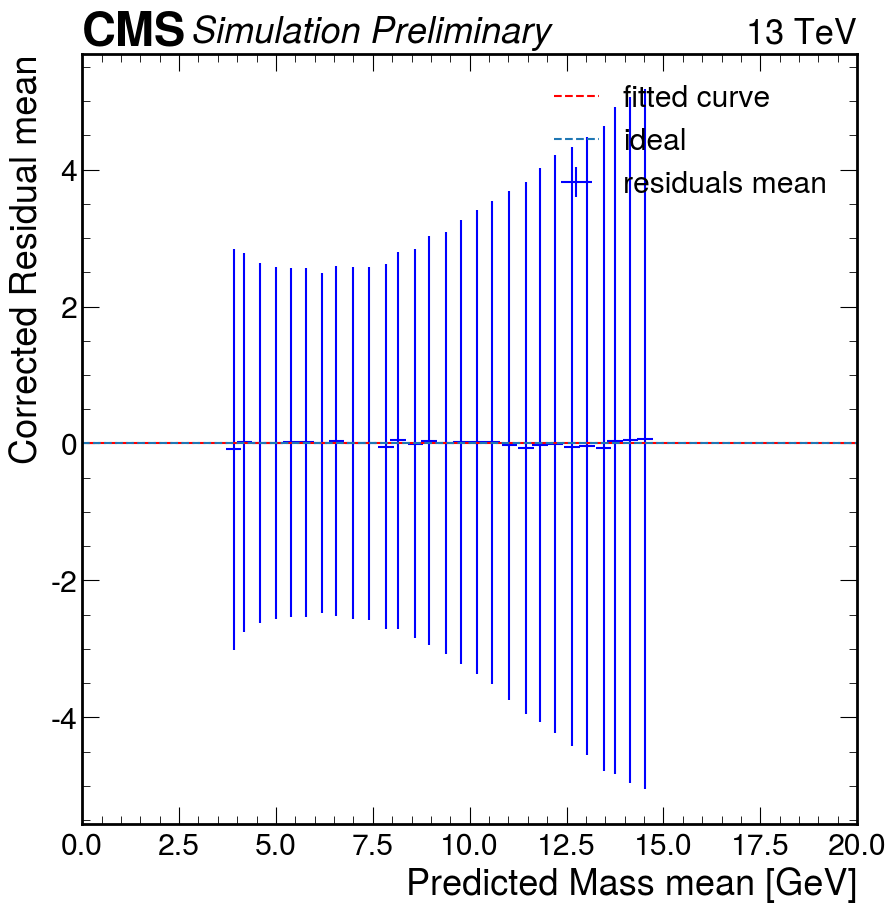

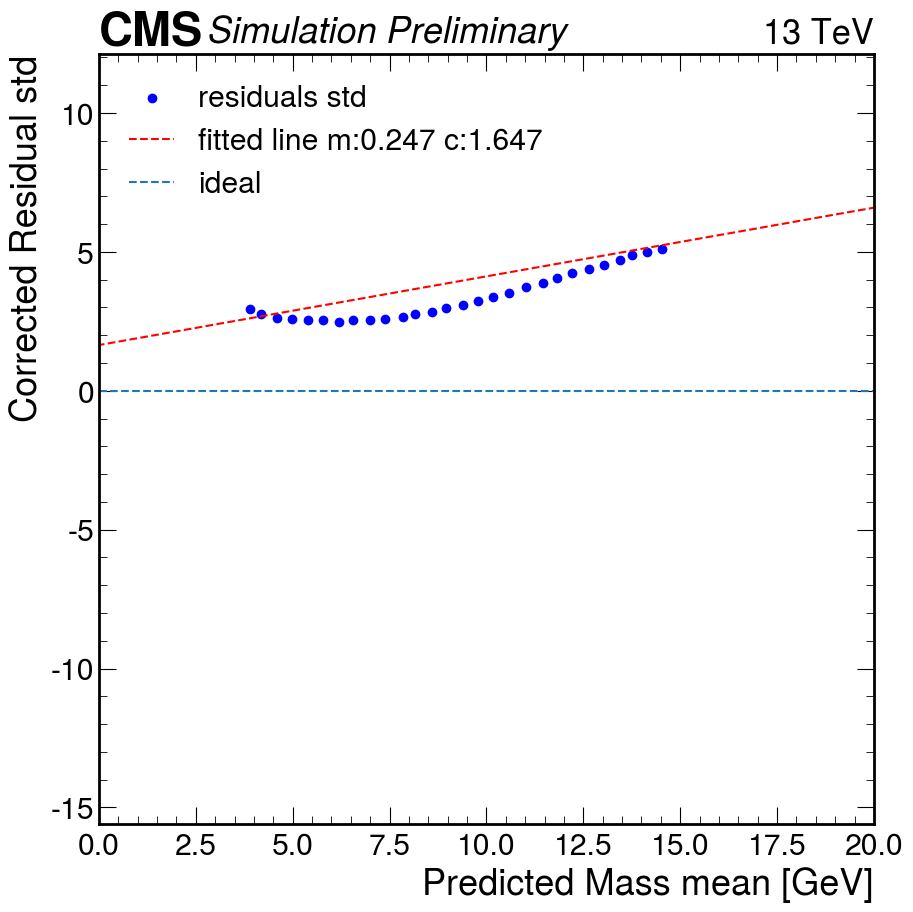

In [22]:
degree_mean = 3
degree_std = 1
m_true_, m_pred_ = [], []
data_files = glob.glob(f"{valid_data_path_ResNet_B6}/valid_data_epoch_300/*.pkl")
for file in data_files:
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_.append(data["m_true"])
    m_pred_.append(data["m_pred"])


m_true = np.concatenate(m_true_)
m_pred = np.concatenate(m_pred_)


bins=np.arange(3.6,14.9,0.4)
mean_pred_bins = []
mean_true_bins =[]
residuals_mean = []
residuals_std = []
for i in range(len(bins)-1):
    temp_mass_pred = m_pred[(m_true >= bins[i]) & (m_true< bins[i+1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = m_true[(m_true >= bins[i]) & (m_true< bins[i+1])]
    mean_true_bins.append(np.mean(temp_mass_true))
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean.append(mu)
    residuals_std.append(std)
    
print("---------------------- Original plot ---------------------------------")
fig, ax = plt.subplots()   
coeff_mean = np.polyfit(mean_pred_bins, residuals_mean, degree_mean)
polynomial_mean = np.poly1d(coeff_mean)
x = np.linspace(min(mean_pred_bins),max(mean_pred_bins), num=1000)
y_fit_mean = polynomial_mean(x)
# plt.scatter(mean_pred_bins, residuals_mean,color='b',marker='o',label='residuals mean')
plt.errorbar(mean_pred_bins, residuals_mean, xerr=(bins[1] - bins[0]) / 2, yerr=residuals_std, fmt='none', color='b', label='residuals mean')
plt.plot(x,y_fit_mean, color='r',linestyle='--', label = f"fitted curve" )
plt.xlim(0,20)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual mean")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


coeff_std = np.polyfit(mean_pred_bins, residuals_std, degree_std)
polynomial_std = np.poly1d(coeff_std)
y_fit_std = polynomial_std(x)
fig, ax = plt.subplots()
plt.scatter(mean_pred_bins,residuals_std,color='b',marker='o',label='residuals std')

plt.plot(x,y_fit_std, color='r',linestyle='--', label = f"fitted line m:{coeff_std[0]:.3f} c:{coeff_std[1]:.3f}" )
plt.xlim(0,20)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual std")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 




print("---------------------- frist correction plot ---------------------------------")

def corrected_pred_mean(m):
    mass = m + polynomial_mean(m)
    return mass

m_true_, m_pred_ = [], []
data_files = glob.glob(f"{valid_data_path_ResNet_B6}/valid_data_epoch_{epoch}/*.pkl")
for file in data_files:
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_.append(data["m_true"])
    m_pred_.append(data["m_pred"])


m_true = np.concatenate(m_true_)
m_pred = np.concatenate(m_pred_)
m_pred = corrected_pred_mean(m_pred)

bins=np.arange(3.6,14.9,0.4)
mean_pred_bins = []
mean_true_bins =[]
residuals_mean = []
residuals_std = []
for i in range(len(bins)-1):
    temp_mass_pred = m_pred[(m_true >= bins[i]) & (m_true< bins[i+1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = m_true[(m_true >= bins[i]) & (m_true< bins[i+1])]
    mean_true_bins.append(np.mean(temp_mass_true))
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean.append(mu)
    residuals_std.append(std)

coeff_mean1 = np.polyfit(mean_pred_bins, residuals_mean, 1)
polynomial_mean1 = np.poly1d(coeff_mean1)
x = np.linspace(min(m_pred),max(m_pred), num=1000)
y_fit_mean1 = polynomial_mean1(x)

fig, ax = plt.subplots() 
# plt.scatter(mean_pred_bins, residuals_mean,color='b',marker='o',label='residuals mean')
plt.errorbar(mean_pred_bins, residuals_mean, xerr=(bins[1] - bins[0]) / 2, yerr=residuals_std, fmt='none', color='b', label='residuals mean')
plt.plot(x,y_fit_mean1, color='r',linestyle='--', label = f"fitted curve" )
plt.xlim(0,20)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Corrected Residual mean")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


coeff_std1 = np.polyfit(mean_pred_bins, residuals_std, 1)
polynomial_std1 = np.poly1d(coeff_std1)
y_fit_std1 = polynomial_std1(x)
fig, ax = plt.subplots()
plt.scatter(mean_pred_bins,residuals_std,color='b',marker='o',label='residuals std')
plt.plot(x,y_fit_std1, color='r',linestyle='--', label = f"fitted curve" )
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Corrected Residual std")
plt.xlim(0,20)
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 




# print("---------------------- Second correction plot ---------------------------------")

def corrected_pred_mean_2(m):
    mass = corrected_pred_mean(m)
    mass = mass+polynomial_mean1(mass)
    return mass






m_true_, m_pred_ = [], []
data_files = glob.glob(f"{valid_data_path_ResNet_B6}/valid_data_epoch_{epoch}/*.pkl")
for file in data_files:
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_.append(data["m_true"])
    m_pred_.append(data["m_pred"])




m_true = np.concatenate(m_true_).flatten()
m_pred = np.concatenate(m_pred_).flatten()
m_pred = corrected_pred_mean_2(m_pred)

bins=np.arange(3.6,14.9,0.4)
mean_pred_bins = []
mean_true_bins =[]
residuals_mean = []
residuals_std = []
for i in range(len(bins)-1):
    temp_mass_pred = m_pred[(m_true >= bins[i]) & (m_true< bins[i+1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = m_true[(m_true >= bins[i]) & (m_true< bins[i+1])]
    mean_true_bins.append(np.mean(temp_mass_true))
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean.append(mu)
    residuals_std.append(std)

coeff_mean3 = np.polyfit(mean_pred_bins, residuals_mean, 1)
polynomial_mean3 = np.poly1d(coeff_mean3)
x = np.linspace(min(m_pred),max(m_pred), num=1000)
y_fit_mean3 = polynomial_mean3(x)

fig, ax = plt.subplots() 
# plt.scatter(mean_pred_bins, residuals_mean,color='b',marker='o',label='residuals mean')
plt.errorbar(mean_pred_bins, residuals_mean, xerr=(bins[1] - bins[0]) / 2, yerr=residuals_std, fmt='none', color='b', label='residuals mean')
plt.plot(x,y_fit_mean3, color='r',linestyle='--', label = f"fitted curve" )
plt.xlim(0,20)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Corrected Residual mean")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


coeff_std3 = np.polyfit(mean_pred_bins, residuals_std, 1)
polynomial_std3 = np.poly1d(coeff_std3)
y_fit_std1 = polynomial_std1(x)
fig, ax = plt.subplots()
plt.scatter(mean_pred_bins,residuals_std,color='b',marker='o',label='residuals std')
plt.plot(x,y_fit_std1, color='r',linestyle='--', label = f"fitted line m:{coeff_std1[0]:.3f} c:{coeff_std1[1]:.3f}" )
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlim(0,20)
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Corrected Residual std")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


In [23]:
def plot_signal_corrected_with_mean(Mass = '5'):
    mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
    print("Signal Mass : ", mass)
    m_pred_ = []
    data_paths = glob.glob(f'/pscratch/sd/b/bbbam/ResNet_B6_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_{Mass}_*/test_data_epoch_{epoch}_M{Mass}/Inference_data_test*.pkl')
    for file in data_paths:
        infile = open(f"{file}", "rb")
        data = pickle.load(infile)
        infile.close()

        m_pred_.append(data["m_pred"])

    m_pred_ = np.concatenate(m_pred_).flatten()
    m_pred = corrected_pred_mean_2(m_pred_)

    m0_min = 0.8
    m0_max = 17.2
    bin_size = 0.4
    fig, ax = plt.subplots()
    plt.hist(np.array(m_pred).flatten(), range=(mass-10,mass+10), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='corrected')
    plt.hist(np.array(m_pred_).flatten(), range=(mass-10,mass+10), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='--', color='r', linewidth=2, label='original')
    plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events density/ 0.4 [GeV]')
    plt.legend(loc='best')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    plt.show() 



Signal Mass :  3.7


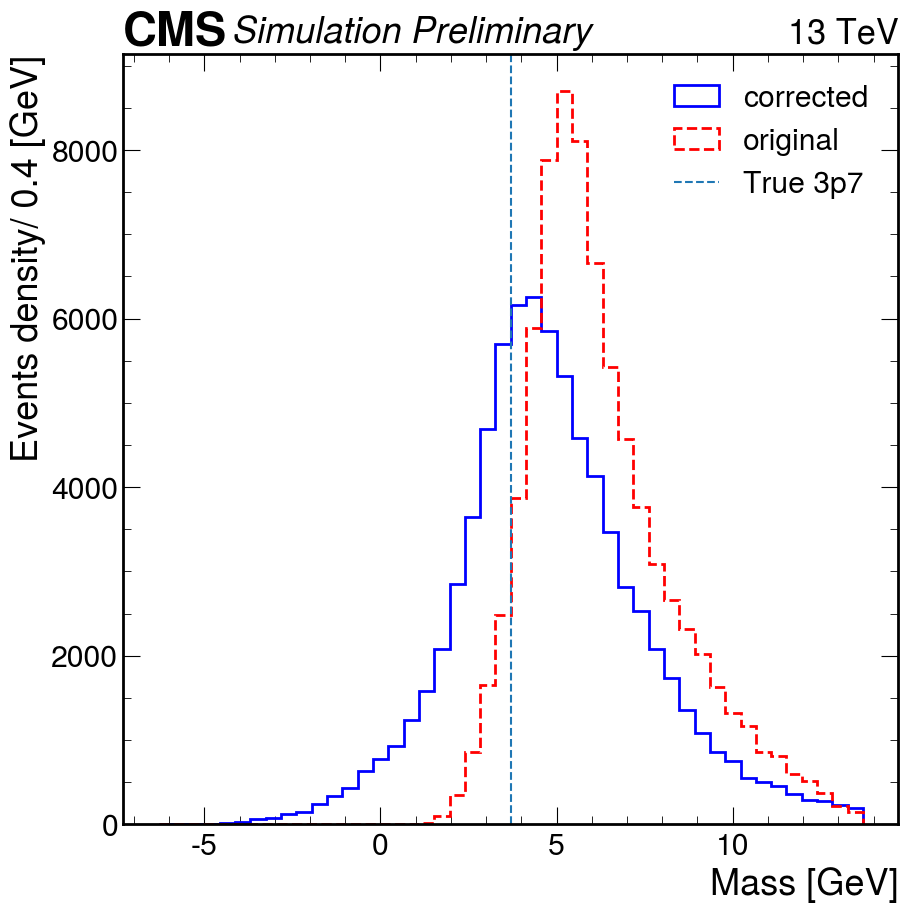

Signal Mass :  5


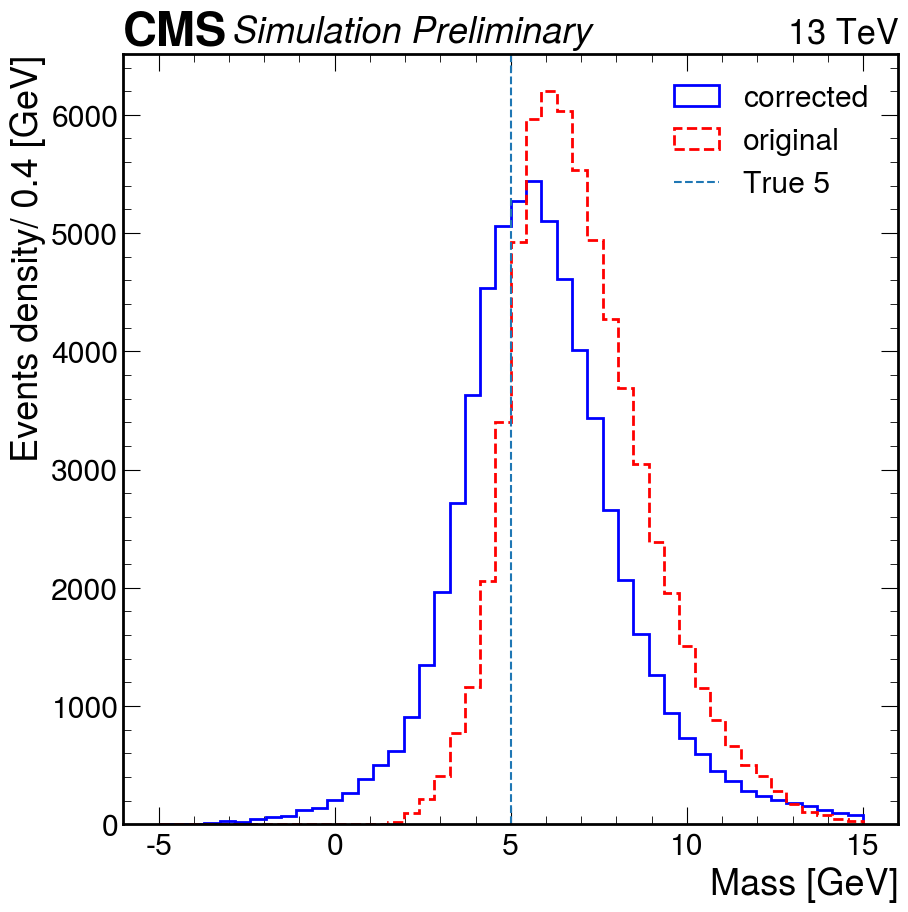

Signal Mass :  8


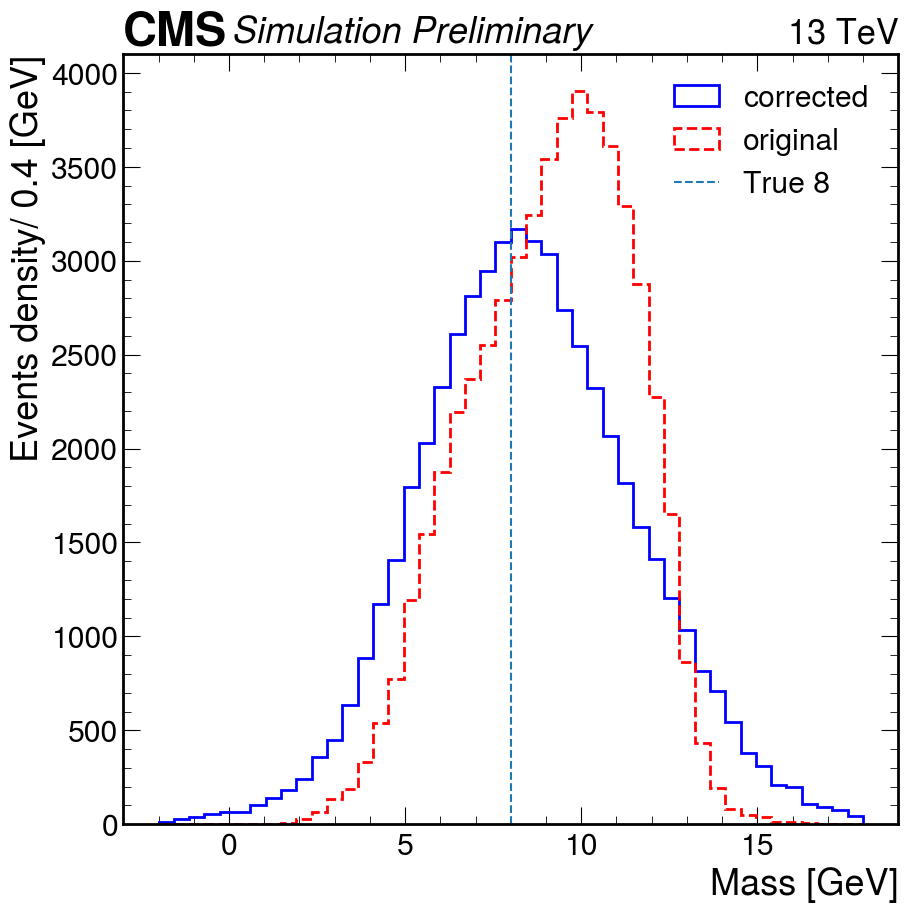

Signal Mass :  12


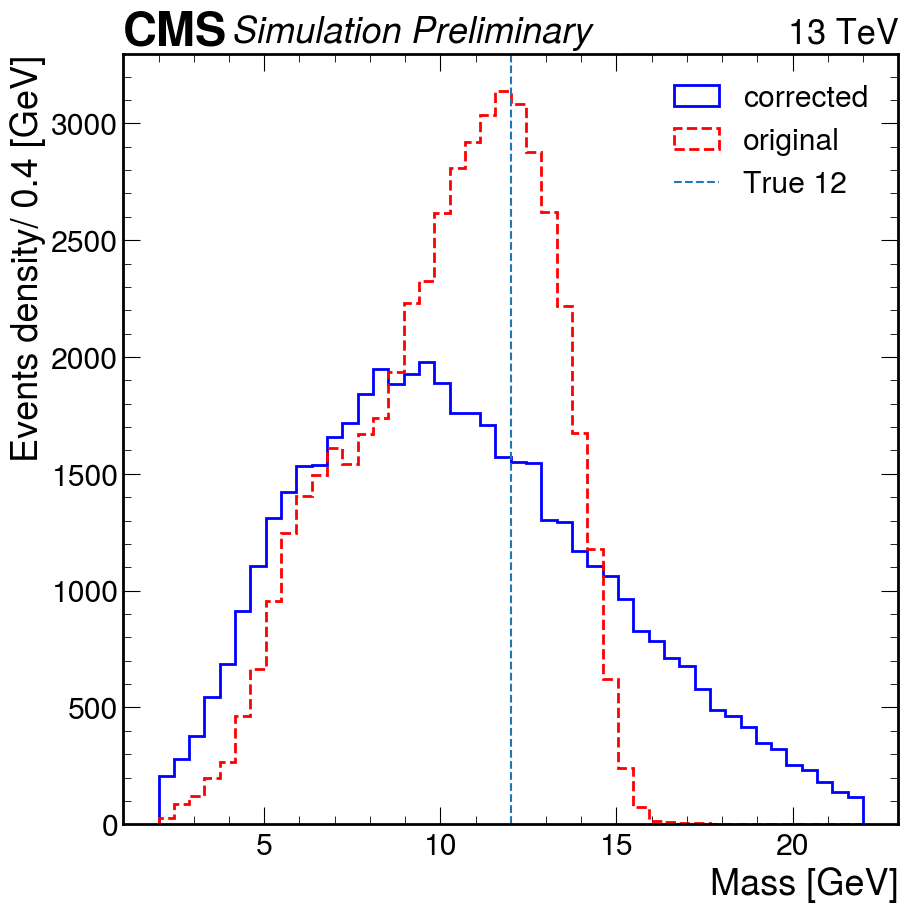

In [24]:
Masses  = ['3p7', '5', '8', '12']
for m in Masses:
    plot_signal_corrected_with_mean(Mass = m)

### fitting  to residuals mode

In [3]:
def get_hist_mode(data, bins=len(np.arange(3.6,14.9,0.4))):
    counts, bin_edges = np.histogram(data, bins=bins)

    # Find the index of the mode bin
    mode_bin_index = np.argmax(counts)

    # Get the mode bin range
    mode_bin_start = bin_edges[mode_bin_index]
    mode_bin_end = bin_edges[mode_bin_index + 1]
    
    return (mode_bin_end + mode_bin_start)/2

In [4]:
def compute_uncertainty(data, n_bootstraps=1000):
    mode_bins = []

    for _ in range(n_bootstraps):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        counts, bin_edges = np.histogram(bootstrap_sample, bins=30)
        mode_bin_index = np.argmax(counts)
        mode_bin_start = bin_edges[mode_bin_index]
        mode_bin_end = bin_edges[mode_bin_index + 1]
        mode_bins.append((mode_bin_start + mode_bin_end) / 2)

    return np.std(mode_bins)

def find_convergence(data, initial_bootstraps=1000, max_bootstraps=100000, step=1000, threshold=0.01):
    n_bootstraps = initial_bootstraps
    prev_uncertainty = compute_uncertainty(data, n_bootstraps)
    uncertainties = [(n_bootstraps, prev_uncertainty)]
    
    while n_bootstraps <= max_bootstraps:
        n_bootstraps += step
        current_uncertainty = compute_uncertainty(data, n_bootstraps)
        uncertainties.append((n_bootstraps, current_uncertainty))
        
        # Check for convergence
        if abs(current_uncertainty - prev_uncertainty) < threshold:
            print(f"Converged after {n_bootstraps} bootstraps.")
            break
            
        prev_uncertainty = current_uncertainty
    
    return prev_uncertainty, n_bootstraps

Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 5000 bootstraps.
Converged after 4000 bootstraps.
Converged after 5000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.


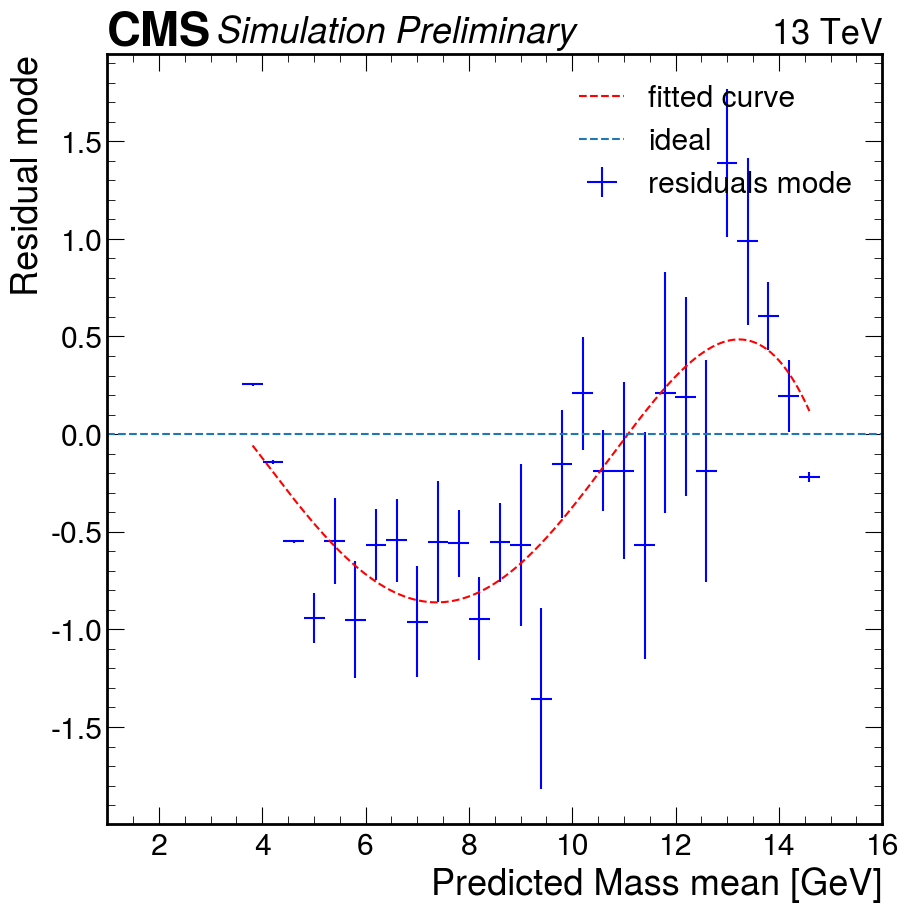

Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 3000 bootstraps.
Converged after 4000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 4000 bootstraps.
Converged after 3000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 3000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.
Converged after 3000 bootstraps.
Converged after 2000 bootstraps.


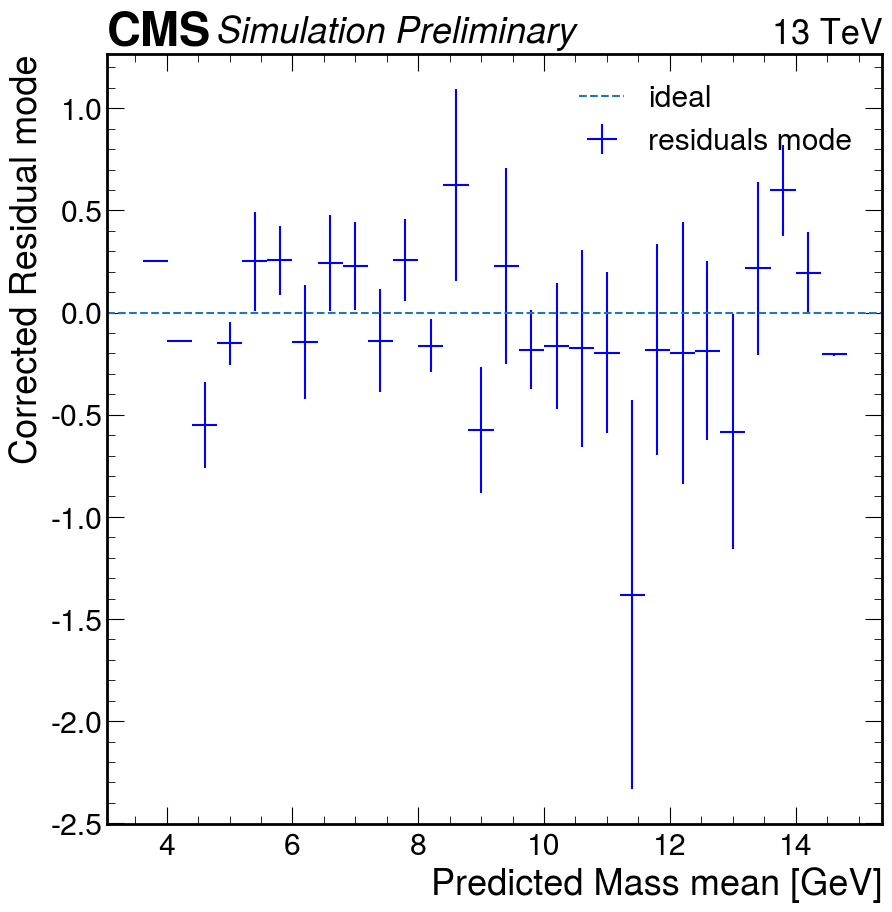

In [6]:
epoch=300
data_files = glob.glob(f"{valid_data_path_ResNet_B6}/valid_data_epoch_{epoch}/*.pkl")
m_true_, m_pred_ = [], []
for file in data_files:
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_.append(data["m_true"])
    m_pred_.append(data["m_pred"])


m_true = np.concatenate(m_true_)
m_pred = np.concatenate(m_pred_)

mask = (m_true >= 3.6) & (m_true < 14.8)
m_pred = m_pred[mask]
m_true = m_true[mask]



# Initial calculations
bins = np.arange(3.6, 14.9, 0.4)
mean_pred_bins = []
mean_true_bins = []
residuals_mean = []
residuals_std = []
residuals_mode = []
mode_errors = []
for i in range(len(bins) - 1):
    temp_mass_pred = m_pred[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = m_true[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    mean_true_bins.append(np.mean(temp_mass_true))
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = temp_residual.mean(), temp_residual.std()
    residuals_mean.append(mu)
    residuals_std.append(std)
    residuals_mode.append(get_hist_mode(temp_residual))
    uncertainty, n_bootstraps = find_convergence(temp_residual)
    mode_errors.append(uncertainty)

# Polynomial fit
coeff_mode = np.polyfit(mean_pred_bins, residuals_mode, 4)
polynomial_mode = np.poly1d(coeff_mode)
x = np.linspace(min(mean_pred_bins), max(mean_pred_bins), num=1000)
y_fit_mean = polynomial_mode(x)

# First plot with error bars
fig, ax = plt.subplots()
plt.errorbar(mean_pred_bins, residuals_mode, xerr=(bins[1] - bins[0]) / 2, yerr=mode_errors, fmt='none', color='b', label='residuals mode')
plt.plot(x, y_fit_mean, color='r', linestyle='--', label=f"fitted curve")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlim(1, 16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual mode")
plt.legend()
plt.show()

#--------------------------------------------------- Correction function------------------------------------------------------------------------------------------------
def corrected_pred_mode(m):
    mass = m + polynomial_mode(m)
    return mass

data_files = glob.glob(f"{valid_data_path_ResNet_B6}/valid_data_epoch_{epoch}/*.pkl")
m_true_, m_pred_ = [], []
for file in data_files:
    infile = open(f"{file}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_.append(data["m_true"])
    m_pred_.append(data["m_pred"])


m_true = np.concatenate(m_true_)
m_pred = np.concatenate(m_pred_)

mask = (m_true >= 3.6) & (m_true < 14.8)
m_pred = m_pred[mask]
m_true = m_true[mask]
m_pred = corrected_pred_mode(m_pred)

# # Extended version
# fig, ax = plt.subplots(figsize=(20,15), dpi=150)
# plt.hist2d(np.squeeze(m_true),np.squeeze(m_pred), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap,vmin=0, vmax=2200)
# plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
# plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
# plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# # plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# # plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
# plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
# plt.grid(color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()


# Recalculate for corrected predictions
mean_pred_bins = []
mean_true_bins = []
residuals_mean_2 = []
residuals_std_2 = []
residuals_mode_2 = []
mode_errors_2 = []
for i in range(len(bins) - 1):
    temp_mass_pred = m_pred[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = m_true[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    mean_true_bins.append(np.mean(temp_mass_true))
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean_2.append(mu)
    residuals_std_2.append(std)
    residuals_mode_2.append(get_hist_mode(temp_residual))
    uncertainty, n_bootstraps = find_convergence(temp_residual)
    mode_errors_2.append(uncertainty)

# Second plot with error bars
fig, ax = plt.subplots()
plt.errorbar(mean_pred_bins, residuals_mode_2, xerr=(bins[1] - bins[0]) / 2, yerr=mode_errors_2, fmt='none', color='b', label='residuals mode')
plt.axhline(y=0, linestyle='--', label="ideal")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Corrected Residual mode")
plt.legend()
plt.show()


In [9]:
epoch=300
def plot_signal_corrected_with_mode(Mass = '5'):
    mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
    print("Signal Mass : ", mass)
    m_pred_ = []
    data_paths = glob.glob(f'/pscratch/sd/b/bbbam/ResNet_B6_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_{Mass}_*/test_data_epoch_{epoch}_M{Mass}/Inference_data_test*.pkl')
    for file in data_paths:
        infile = open(f"{file}", "rb")
        data = pickle.load(infile)
        infile.close()

        m_pred_.append(data["m_pred"])

    m_pred_ = np.concatenate(m_pred_).flatten()
    m_pred = corrected_pred_mode(m_pred_)
   

    m0_min = 0.8
    m0_max = 17.2
    bin_size = 0.4

    fig, ax = plt.subplots()
    plt.hist(np.array(m_pred).flatten(), range=(mass-10,mass+10), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='corrected')
    plt.hist(np.array(m_pred_).flatten(), range=(mass-10,mass+10), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='--', color='r', linewidth=2, label='original')
    plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events density/ 0.4 [GeV]')
    plt.legend(loc='best')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    plt.show() 



Signal Mass :  3.7


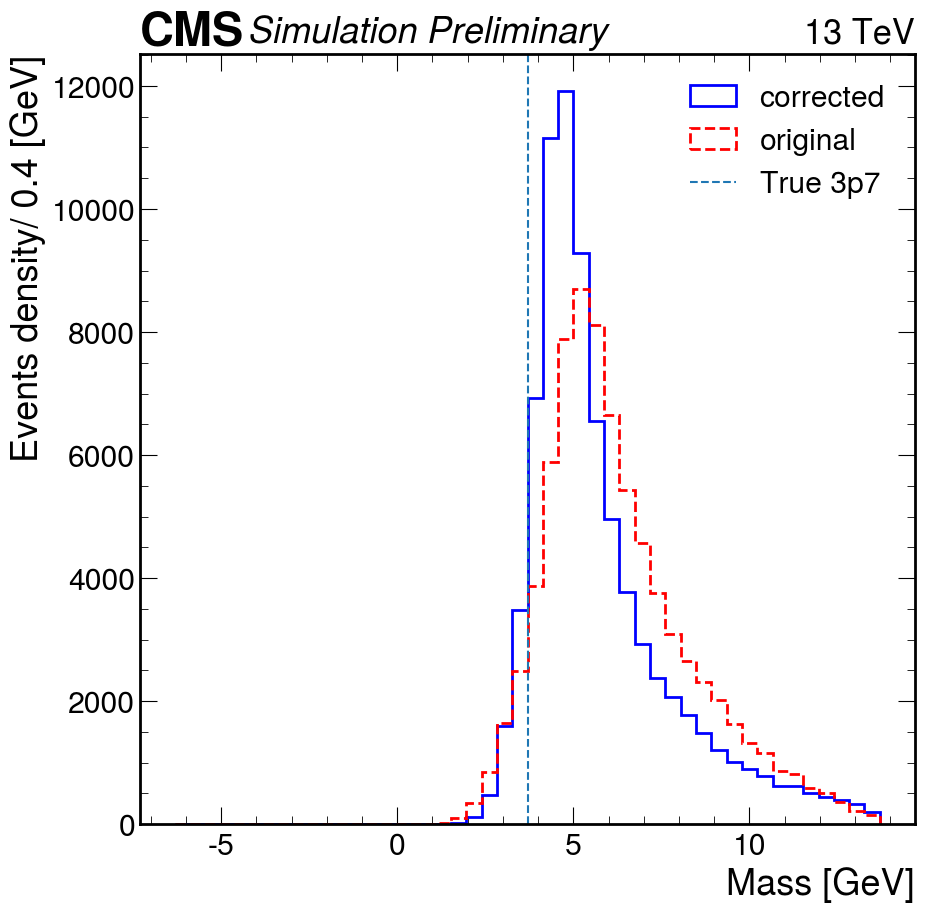

Signal Mass :  5


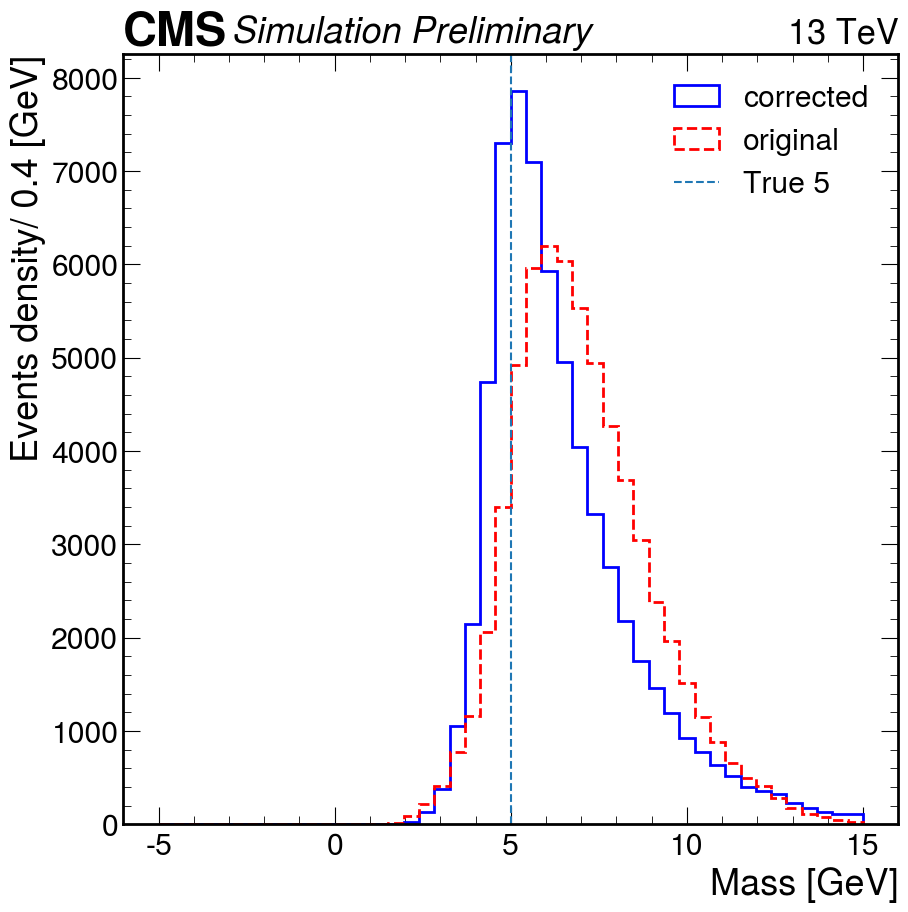

Signal Mass :  8


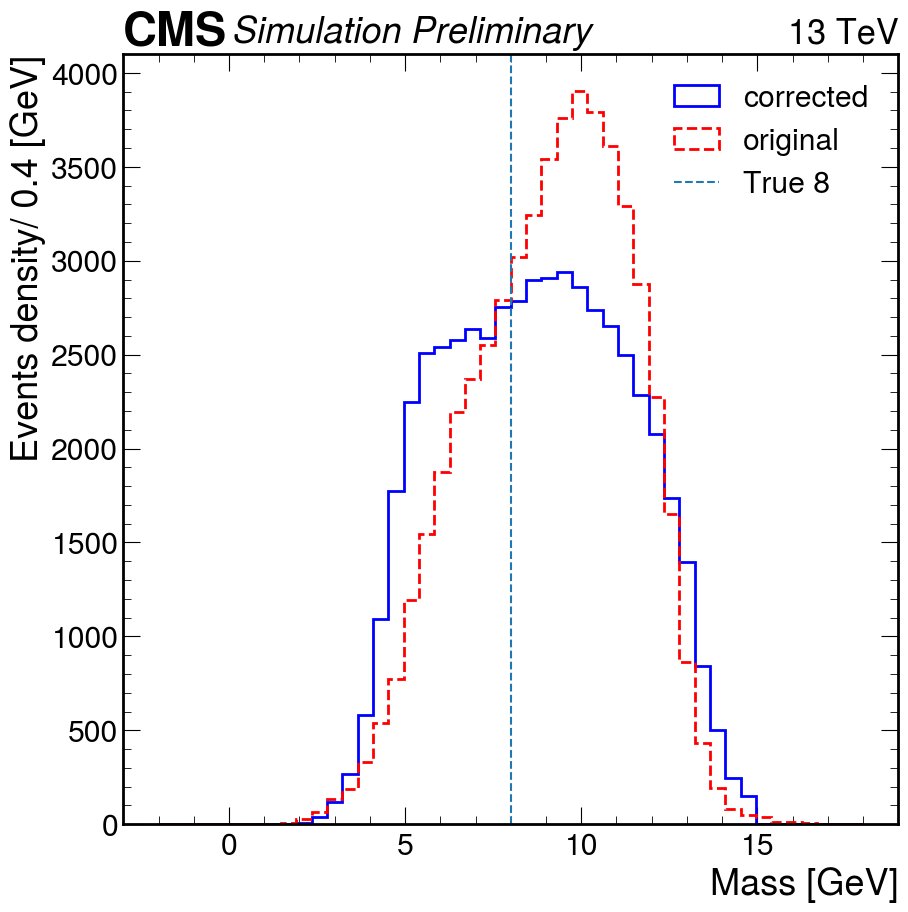

Signal Mass :  12


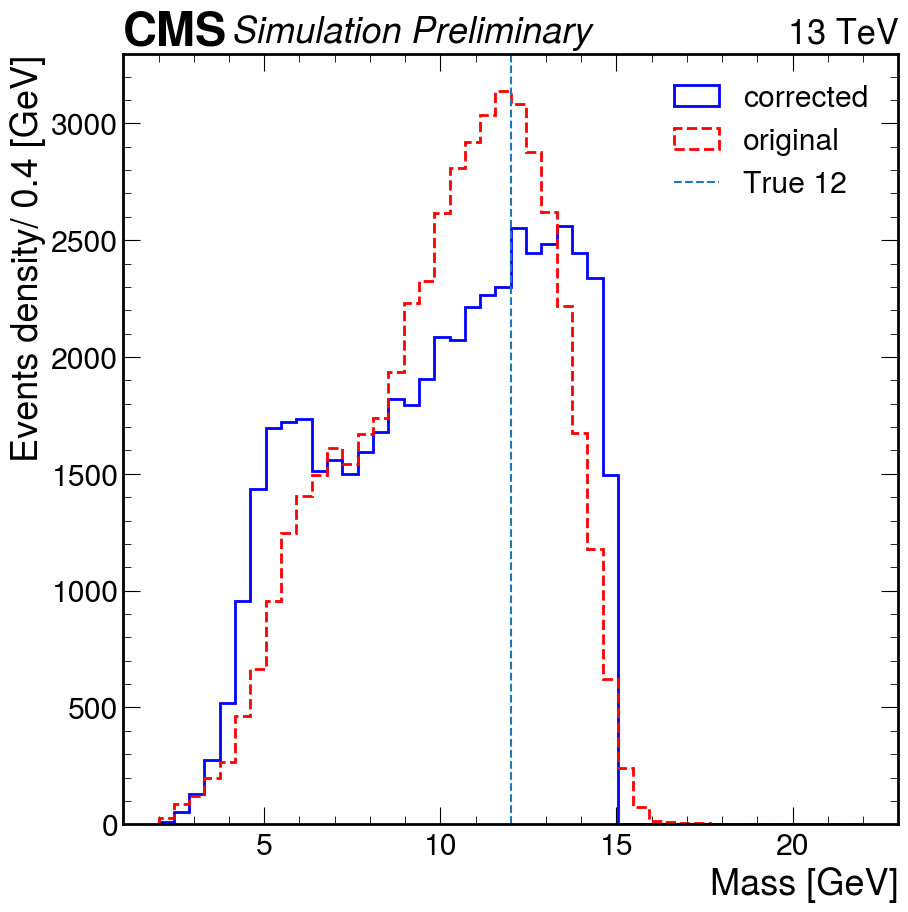

In [10]:
Masses  = ['3p7', '5', '8', '12']
for Mass in Masses:
    plot_signal_corrected_with_mode(Mass)

## comparing model prediction with mean and mode

In [25]:
def plot_signal_corrected_with_mean_mode(Mass = '5'):
    mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
    print("Signal Mass : ", mass)
    

    m_pred_, m_true_ = [], []
    data_paths = glob.glob(f'/pscratch/sd/b/bbbam/ResNet_B6_Nodes_4.0/13_channels_massregressor_multi_node_inference_Mass_{Mass}_*/test_data_epoch_{epoch}_M{Mass}/Inference_data_test*.pkl')
    for file in data_paths:
        infile = open(f"{file}", "rb")
        data = pickle.load(infile)
        infile.close()
        m_true_.append(data["m_true"])
        m_pred_.append(data["m_pred"])

    m_pred_ = np.concatenate(m_pred_).flatten()
    m_pred_mean = corrected_pred_mean_2(m_pred_)
    m_pred_mode = corrected_pred_mode(m_pred_)




    

    m0_min = 0.8
    m0_max = 17.2
    bin_size = 0.4
    fig, ax = plt.subplots()
    plt.hist(np.array(m_pred_mean).flatten(), range=(mass-10,mass+10), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='corr. with mean')
    plt.hist(np.array(m_pred_mode).flatten(), range=(mass-10,mass+10), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='red', linewidth=2, label='corr. with mode')
    plt.hist(np.array(m_pred_).flatten(), range=(mass-10,mass+10), bins=len(np.arange(0,m0_max+1.2,bin_size)),  linestyle='--', color='grey', alpha=0.2, label='original')
    plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events density/ 0.4 [GeV]')
    plt.legend(loc='best')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    plt.show() 

Signal Mass :  3.7


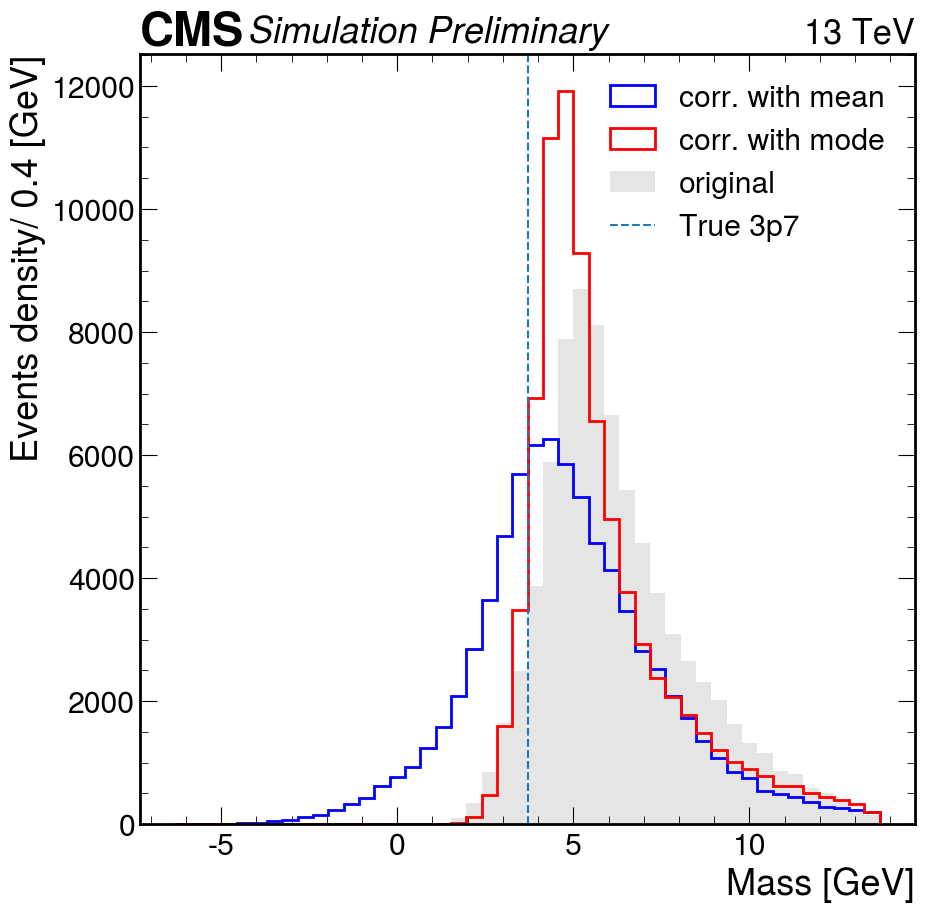

Signal Mass :  5


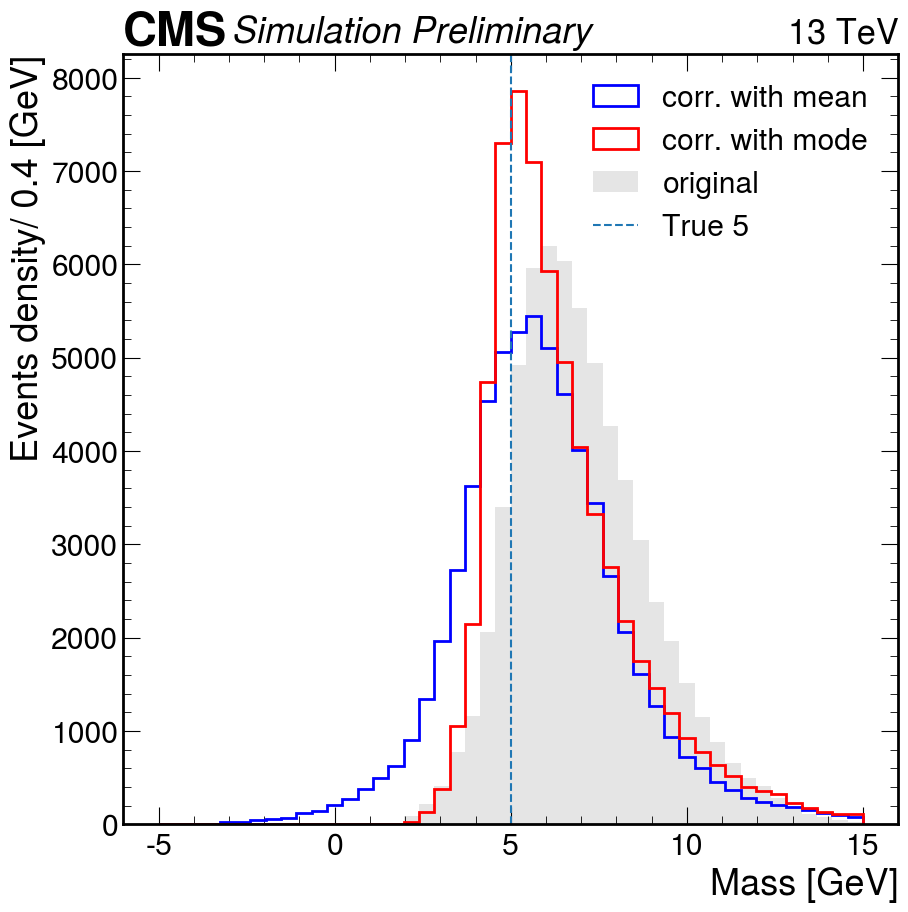

Signal Mass :  8


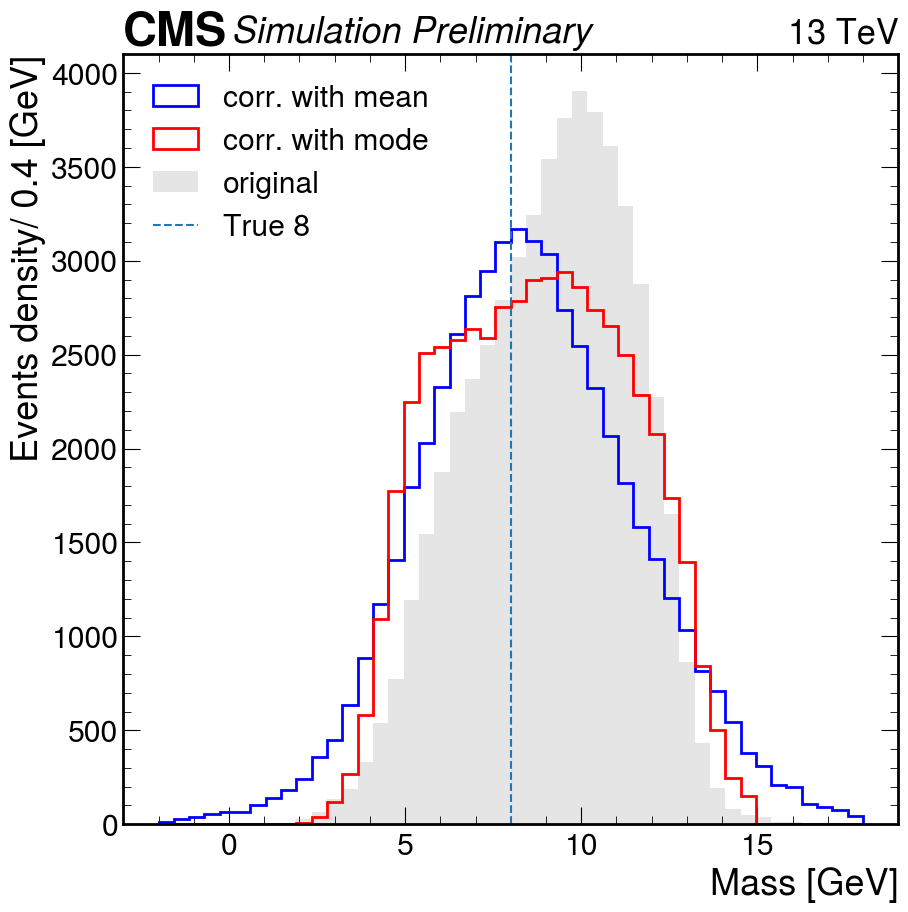

Signal Mass :  12


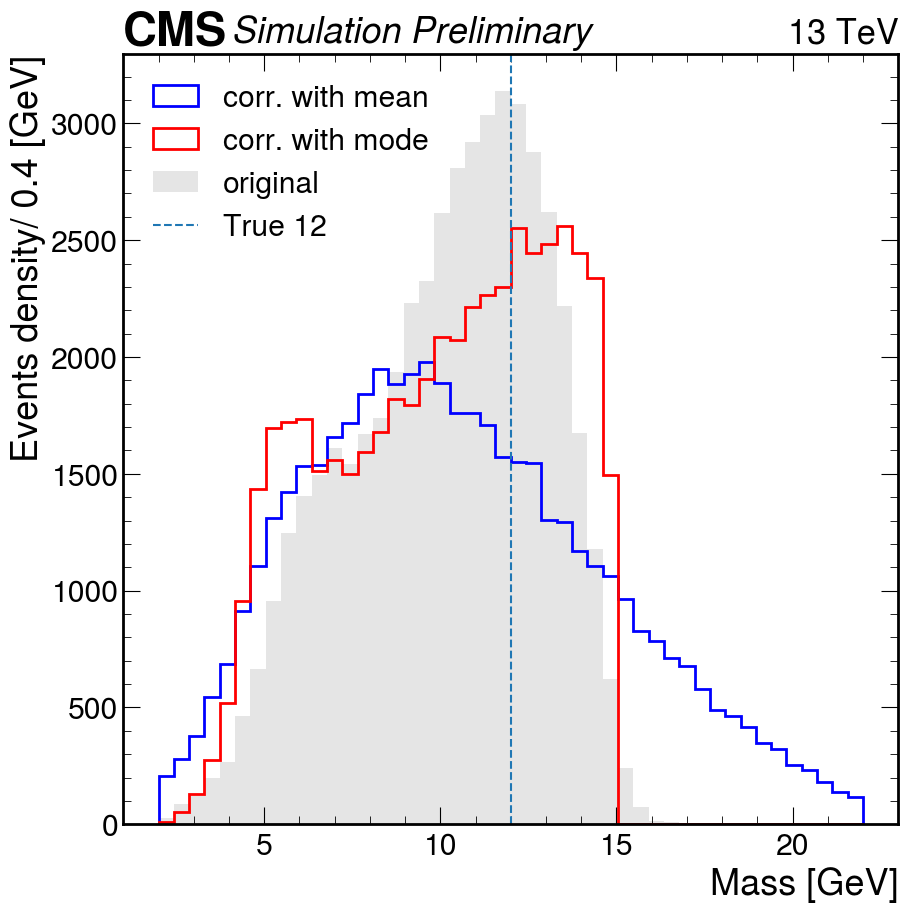

In [26]:
Masses  = ['3p7', '5', '8', '12']
for Mass in Masses:
    plot_signal_corrected_with_mean_mode(Mass)